##Importing all the required libraries:

In [4]:
import os, cv2,logging,sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skew, kurtosis

logging.disable(logging.WARNING)
logging.disable(logging.WARNING)

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Approach:
**Dataset used**: Advertising dataset, less features, easy to explain to beginners


* Visualize and explain how each feature is affecting the output variable using Simple linear regression
* Understand p-value, F-statistic, coeficients in linear regression, R square metric
* Use Multiple Regression where we will be using all the features as input to the model and get better understanding how each feature is affecting the output variable

**Reference:** Introduction to Statistics in R book

##Read and display the dataset:

In [5]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


* Pandas .read_csv() imports the CSV dataset.
  1. All the values shown here are in terms of 1000 (ie, for 230.1 in cell, it actually refers to 230100)
  2. Using this dataset we will build a linear regression model to predict Sales using an appropriate predictor variable (TV, Radio, Newspaper advertising)

* Pandas .head() will display the first 'n' rows of the dataset (by default n=5)

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


* Pandas describe() is used to display some basic statistical details of the dataset. 

* **Descriptive statistics** enables us to present the data in a more meaningful way, which allows simpler visualization and interpretation of the data.

## Pairwise Plot:
* It gives a clear visualization about linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label). This also assumes that the predictors are additive.

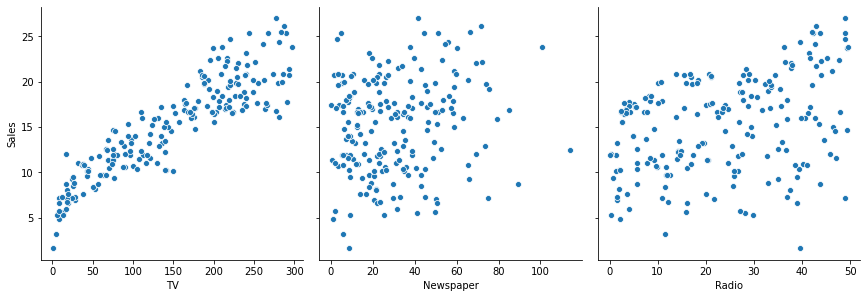

In [7]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',
             height=4, aspect=1, kind='scatter')
plt.show()

### Analysis:
* TV has a good linear relationship and is expected to have a good correlation.
* The other features follows non-linearity. Linear regression will not be the perfect fit for this dataset.
* Dataset doesn't have any null or missing values, so needn't use any data imputations techniques 


## Simple Linear Regression Model to predict Sales using TV advertisements:
As the sales shows linearity with the TV, we will build the simple linear regression to create the baseline


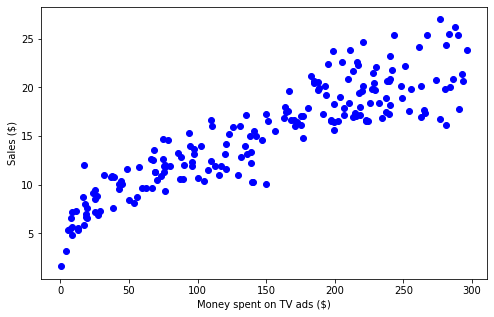

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

### Fitting the simple linear regression line:

* Scikit-Learn library can be used to implement regression functions. 
* We need to import LinearRegression class, instantiate it, and call the fit() method along with our training data to train the model.
* .predict() returns the predicted values
* .score() returns the coefficient of determination($R^{2}$) of the prediction

In [9]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
pred = reg.predict(X)
print("R-squared:", reg.score(X,y)) 
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

R-squared: 0.8121757029987413
The linear model is: Y = 6.9748 + 0.055465X


### Analysis:
* If we don't spend anything on the advertisement (ie, if X = 0) then the number of units that will be sold are $b_{0}$ (ie) 6,974 units.
* If we spend 1000\$ on TV advertisements then sales will increase by 55 units $b_{1}$ coefficient

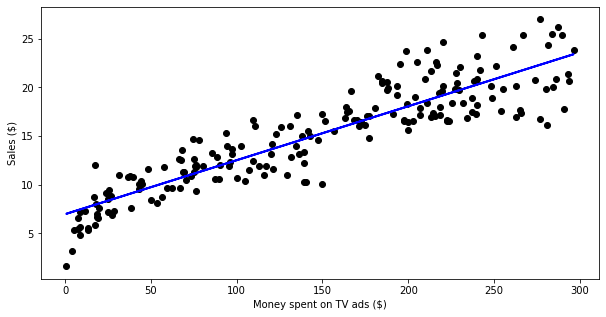

In [10]:
predictions = reg.predict(X)
plt.figure(figsize=(10, 5))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

Simple linear regression line is depicted in blue color above

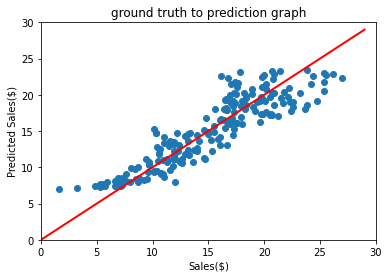

In [11]:
fig, ax = plt.subplots()
line = np.linspace(0,29,30)
ax.scatter(data['Sales'],predictions)
ax.set_title('ground truth to prediction graph')
ax.set_ylim(0,30)
ax.set_xlim(0,30)
ax.plot(
    line,
    line,
    c='red',
    linewidth=2
)
plt.xlabel("Sales($)")
plt.ylabel("Predicted Sales($)")
plt.show()

### Analysis:
* The above graph shows the ground truth to that of the predicted value. Perfect regression line has all the data points falling on the red line.
* The assumption that the residuals follows normality(zero mean and unit variance) can be analysed using the graph.
* After finding the statistical analysis of the residual, the above plot helps to remove the noise points while analysis. Based on the mean of residual, the outlier can be detected. 

In [12]:
residuals=data['Sales'].values.reshape(200,1)-predictions
mean_res=np.mean(residuals)
print("Mean of Residuals: {}".format(mean_res))
print("skewness:",skew(residuals)[0])
print("Kurtosis:",kurtosis(residuals)[0])

Mean of Residuals: -1.652011860642233e-15
skewness: -0.017539590491253965
Kurtosis: -0.06245997242101975


###Analysis of Mean of residuals:
* **Mean of residuals** ≈ 0, hence our line is the "best fit line"
* **Skewness** is the measure of lack of symmetry. A distribution is symmetric if it looks the same to the left and right of the center point.
* **Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. Data sets with low kurtosis tend to have light tails or lack of outliers. 

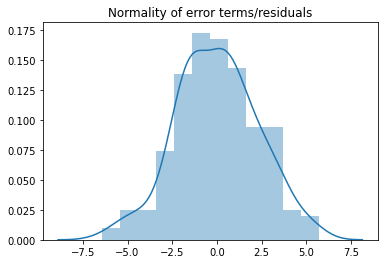

In [13]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

### Analysis of Normality of the residuals:
* The residuals follows the property of the normal distribution.

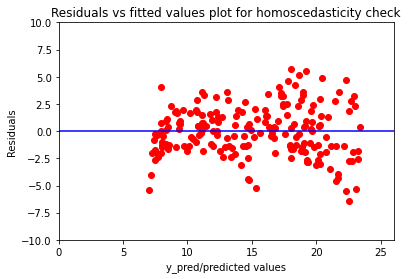

In [14]:
plt.scatter(predictions,residuals,color='red')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot([0,26],[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

### Check for Homoscedasticity:
* Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

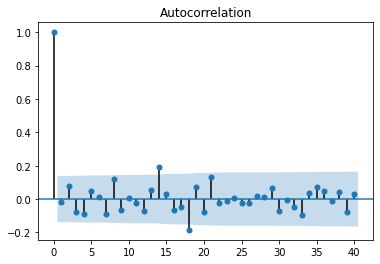

p value:  0.025144734535132243


In [15]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()
from statsmodels.stats import diagnostic as diag
print("p value: ",min(diag.acorr_ljungbox(residuals , lags = 40)[1]))

### Checking for autocorrelation: 
* To ensure the absence of autocorrelation we use Ljungbox test.
* Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated

In [16]:
X = np.column_stack((data['TV'])).reshape(200,1)
y = data['Sales'].values.reshape(-1,1)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.93e-74
Time:                        08:43:23   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

###Analysis:
* We have used statsmodels to get the summary of all the metrics used for linear regression

* P value is less than 0.05 (ie,in this case ≈0.000), x1 coeficient(TV) is greater than standard error, hence we reject the null hypothesis. Thus, there exist a relation between TV advertising and it's sales, and this purely not by chance. 

* R-squared =0.812 so 81% of variability in Sales is explained by TV advertisement

###Function that checks the assumptions of linear regression:

In [17]:
def check_res(y_true,y_pred):
  fig, ax = plt.subplots()
  ax.scatter(y_true,y_pred)
  ax.set_title('ground truth to prediction graph')
  ax.set_ylim(0,30)
  ax.set_xlim(0,30)
  ax.plot(
    line,
    line,
    c='red',
    linewidth=2
  )
  plt.show()

  residuals=y_true-y_pred
  mean_res=np.mean(residuals)
  print("Mean of Residuals: {}".format(mean_res))

  plt.scatter(y_pred,residuals)
  plt.xlabel('y_pred/predicted values')
  plt.ylabel('Residuals')
  plt.ylim(-10,10)
  plt.xlim(0,26)
  sns.lineplot([0,26],[0,0],color='blue')
  plt.title('Residuals vs fitted values plot for homoscedasticity check')
  plt.show()
  
  sns.distplot(residuals,kde=True)
  plt.title('Normality of error terms/residuals')

  sm.graphics.tsa.plot_acf(residuals, lags=40)
  plt.show()

### Function used to calculate simple linear regression for each feature:

In [18]:
def simple_linear_regression(X,y_true,feature_name):
  '''
  Args:
    X-input
    y_true->ground truth
    feature_name -> name of the feature used
  Returns:
    None
  '''
 
  plt.figure(figsize=(6, 5))

  plt.scatter(
      X,
      y_true,
      c='blue'
  )
  plt.xlabel("Money spent on "+feature_name+" ads ($)")
  plt.ylabel("Sales ($)")
  plt.show()

  reg = LinearRegression()
  reg.fit(X, y_true)
  print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


  predictions = reg.predict(X)
  # plt.figure(figsize=(6, 5))
  # plt.scatter(
  #     X,
  #     y_true,
  #     c='black'
  # )
  # plt.plot(
  #     X,
  #     predictions,
  #     c='blue',
  #     linewidth=2
  # )
  # plt.xlabel("Money spent on "+feature_name+" ads ($)")
  # plt.ylabel("Sales ($)")
  # plt.show()

  # check_res(y_true,predictions)

  # X = np.column_stack((data['Radio'])).reshape(200,1)
  # y = data['Sales'].values.reshape(-1,1)
  # X2 = sm.add_constant(X)
  # est = sm.OLS(y, X2)
  # est2 = est.fit()
  # print(est2.summary())

## Simple Linear Regression Model for Sales using Radio advertisements:

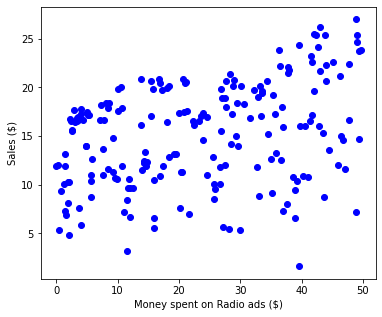

The linear model is: Y = 12.236 + 0.12443X


In [19]:
simple_linear_regression(data['Radio'].values.reshape(200,1),data['Sales'].values.reshape(200,1),'Radio')

## Simple Linear Regression Model for Sales using Newspaper advertisements:

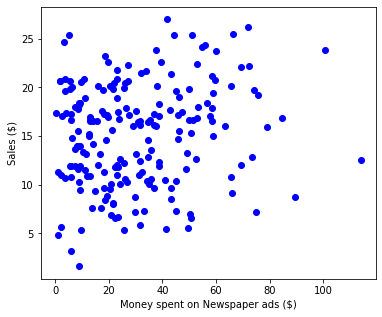

The linear model is: Y = 13.96 + 0.038324X


In [20]:
simple_linear_regression(data['Newspaper'].values.reshape(200,1),data['Sales'].values.reshape(200,1),'Newspaper')

## Multiple Linear Regression (Regression Model using all the features):

In [21]:
Xs = data.drop(['Sales'], axis=1)
print(Xs.head())
y = data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
pred = reg.predict(Xs)
print("Model loss: ", mean_squared_error(y,pred))

print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
Model loss:  2.706006147627315
The linear model is: Y = 4.6251 + 0.054446*TV + 0.107*radio + 0.00033566*newspaper


### Analysis:
* If we spend 1000\$ on TV advertisements then 54 more units will be sold
* If we spend 1000\$ on Radio advertisements then 107 more units will be sold
* If we spend 1000\$ on Newspaper advertisements then not even one extra item will be sold

When we used Simple Linear Regression we found that for each 1000$ spent on Newspaper advertisements there will be increase in sales by 38 units. But when we considered all the features together to build a model we found out that Newspaper advertisements are not playing any role in increasing sales at all because there is a correlation between radio advertisements and newspaper advertisements. When advertisements are done to same customer using radio and newspaper they are actually buying the product because of radio advertisement and not because of newspaper ad. 

In a multiple regression, it is assumed that the effect on the target of increasing one unit of one predictor (is independent|has no influence) on the other predictor. But in real, this is not the case. Sharing a value on two predictors, may have more effect than allocating the entire value to only one (ie, TV and radio advertisements are dependent on each other.) In marketing, this is known as a **synergy effect**, and in statistics it is referred to as an **interaction effect**.

Pearson correlation coefficient:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


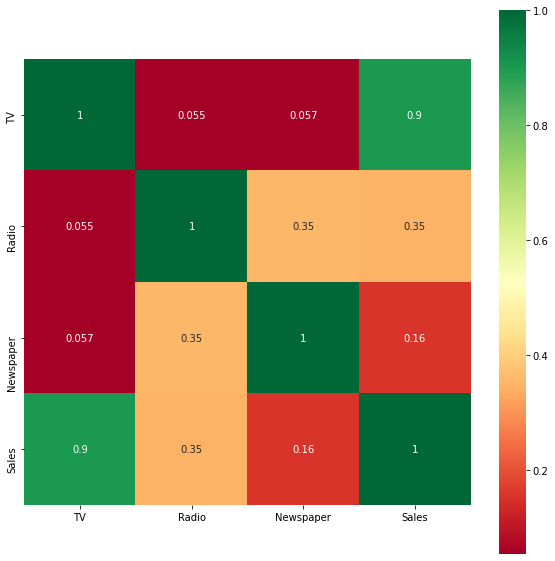

In [22]:
corrrelation= data.corr(method="pearson")
print("Pearson correlation coefficient:")
print(corrrelation);

plt.figure(figsize=(10,10))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True) 

### Analysis of pearson correlation coefficient:

* We need to have correlation b/w input feature and output (If a variable is correlated with the dependent variable then this would be a good sign for our model.)
* We should select one input feature if multiple input features are highly correlated (Correlation within dependent variables is what we need to look for and avoid.)
* This data doesn't contain perfect multicollinearity among independent variables. In case there were any, then we would try to remove one of the correlated variables depending on which has more important to our regression model.

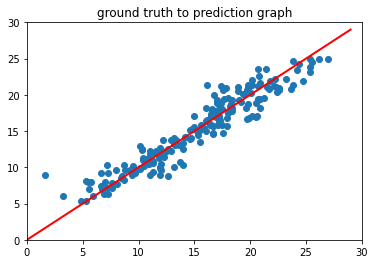

Mean of Residuals: -2.660094367001875e-15


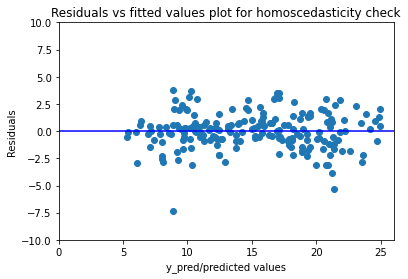

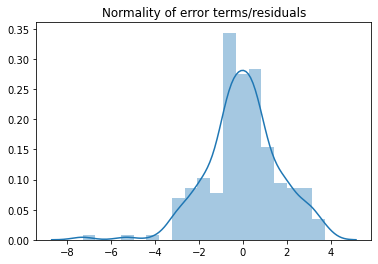

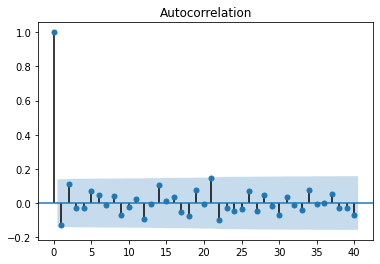

In [23]:
predictions = reg.predict(Xs)
check_res(data['Sales'].values.reshape(200,1),predictions)

In [24]:
X = np.column_stack((data['TV'], data['Radio'], data['Newspaper']))
y = data['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           8.13e-99
Time:                        08:43:24   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

###Analysis:
* We have used statsmodels to get the summary of all the metrics used for multiple linear regression

* In case of TV and radio sales, p value is less than 0.05 (ie,in this case ≈0.000). x1 coeficient(TV), x2 coefficient (Radio) are greater than their standard errors. Hence, we reject the null hypothesis and the relationship is purely not by chance. 

* Whereas in the case of Newspaper sales, p value is greater than 0.05 (ie, in thus case 0.954). Standard error is more than x3 coefficient. We can't reject the null hypothesis, hence there seems to be no linear relation in this case.

##Linear regression model for Sales using only TV and Radio advertisements as predictors:

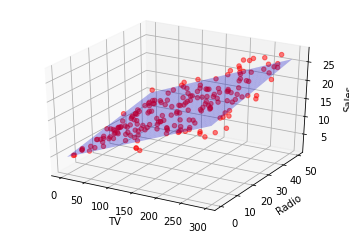

In [25]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Sales ~ TV + Radio', data=data)
results_formula = model.fit()
results_formula.params



## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(data.TV.min(), data.TV.max(), 100),np.linspace(data.Radio.min(), data.Radio.max(), 100))
onlyX = pd.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)



## convert the predicted result in an array
fittedY=np.array(fittedY)




# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['TV'],data['Radio'],data['Sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

####Using above cell we just tried to show how a linear regression model fit surface looks with 2 predictors

In [26]:
from sklearn.preprocessing import PolynomialFeatures
Xs = data.drop(['Sales'], axis=1)

y = data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
# print(reg.params)
pred = reg.predict(Xs)

print("Model loss: ", mean_squared_error(y,pred))
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio ".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]))

Model loss:  2.706006147627315
The linear model is: Y = 4.6251 + 0.054446*TV + 0.107*radio 


In [27]:
X = np.column_stack((data['TV'], data['Radio']))
y = data['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          2.39e-100
Time:                        08:43:25   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

### Analysis:

* As we can see in above cells even when we removed newspaper advertisement predictor, the other estimates (x1,x2) remained the same and F-statistic value has increased. Thus, our current model is better than the previous model with 3 predictors.